<a href="https://colab.research.google.com/github/vxm2ek/wrangling/blob/main/assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

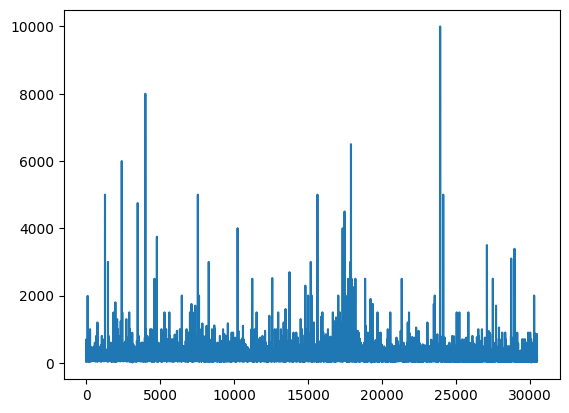

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("airbnb_hw (1).csv")

df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)

df['Price'].plot()
plt.show()


In [148]:
missings = df['Price'].isna().sum()
print("Missing Price values:", missings)

#Removed the commas and converted to floats, no values were lost

Missing Price values: 0


In [149]:
df = pd.read_csv("mn_police_use_of_force (1).csv")

In [150]:
cleaned_data = df.dropna(subset=['subject_injury'])

In [151]:
missing = df['subject_injury'].isna().mean()
print("Prop of missing subject_injury values:", missing)

Prop of missing subject_injury values: 0.7619342359767892


In [152]:
#Yes the large proportion of missing subject_injury values is a concern and could
#lead to false conclusions when cross tabulating the data

cross_tab = pd.crosstab(cleaned_data['subject_injury'], cleaned_data['force_type'])
cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [153]:
df = pd.read_parquet("justice_data.parquet")
df['WhetherDefendantWasReleasedPretrial'].head()

,WhetherDefendantWasReleasedPretrial
0,9
1,0
2,0
3,0
4,1


In [154]:
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({0: 'No', 1: 'Yes'})
print(df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))



WhetherDefendantWasReleasedPretrial
Yes    19154
No      3801
NaN       31
Name: count, dtype: int64


In [155]:
df['WhetherDefendantWasReleasedPretrial'].head()

,WhetherDefendantWasReleasedPretrial
0,NaN
1,No
2,No
3,No
4,Yes


In [156]:
df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()
filtered_rows = df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, ['SentenceTypeAllChargesAtConvictionInContactEvent', 'ImposedSentenceAllChargeInContactEvent']]

print(filtered_rows)

       SentenceTypeAllChargesAtConvictionInContactEvent  \
0                                                     9   
36                                                    9   
268                                                   9   
292                                                   9   
498                                                   9   
...                                                 ...   
22965                                                 9   
22969                                                 9   
22970                                                 9   
22978                                                 9   
22982                                                 9   

      ImposedSentenceAllChargeInContactEvent  
0                                             
36                                            
268                                           
292                                           
498                                           
...      

In [157]:
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]), 'ImposedSentenceAllChargeInContactEvent'] = pd.NA


In [158]:
df['ImposedSentenceAllChargeInContactEvent'].head(10)

,ImposedSentenceAllChargeInContactEvent
0,<NA>
1,60
2,12
3,.985626283367556
4,<NA>
5,12
6,36
7,6
8,24
9,12


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [159]:
df = pd.read_excel('GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df = df.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
                      'original order', 'Unnamed: 21', 'Unnamed: 22'])


In [161]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


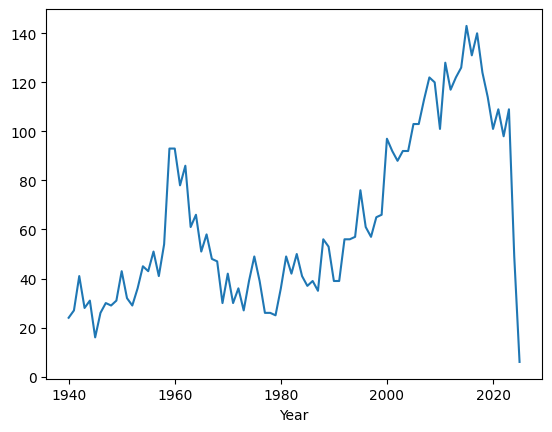

In [162]:
df['Year'].unique()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
cleaned_years = df[(df['Year'] >= 1940) & (df['Year'] <= 2025)]

attacks_by_year = cleaned_years['Year'].value_counts().sort_index()

attacks_by_year.plot()
plt.show()

In [163]:
df['Age'].unique()

array([12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27, 38, 16,
       33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46, 19, 20,
       65, 64, '13', nan, '11', '46', '32', '29', '10', '64', '62', '39',
       '22', '15', '16', '21', '66', '52', '20', '44', '26', '47', '55',
       '30', '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19',
       '20/30', '35', '65', '20s', '77', '60', '49', '42', '!2', '24',
       '73', '25', '18', '50s', '58', '67', '17', '14', '6', '41', '53',
       '68', '43', '40', '51', '31', 39, 58, 51, 17, 10, 13, 60, '40s',
       68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M', 9, 11,
       34, '!6', 31, '!!', 47, 55, 7, 71, 59, 53, 54, 75, '45 and 15', 73,
       52, 29, 70, 4, 63, 44, '28 & 22', '22, 57, 31', '60s', "20's", 43,
       67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12', '36',
       '63', '71', '48', '70', '18 months', '57', '7', '28', '33', '61',
       '74', '27', '3', '56', '28 & 26', '5', '54

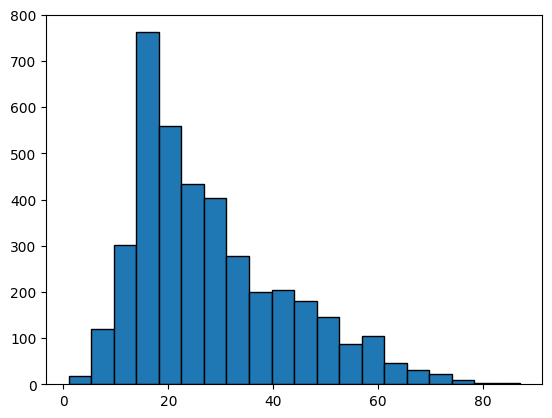

In [164]:
age_replacement_map = {
    'teen': 16,
    'middle-age': 40,
    '9 months': 1,
    '18 months': 1,
    '30s': 35,
    '40s': 45,
    '50s': 55,
    '60s': 65,
    '70s': 75,
    '20s': 25,
    '>50': 50,
    '16 to 18': 17,
    '30 or 36': 33,
    '10 or 12': 11,
    '13 or 14': 13,

}


df['Age'] = df['Age'].replace(age_replacement_map)


df['Age'] = pd.to_numeric(df['Age'].replace('½', '.5'), errors='coerce')

df_cleaned_age = df['Age'].dropna().astype(int)


plt.hist(df_cleaned_age, bins=20, edgecolor='black')

plt.show()

In [165]:
df['Sex'] = df['Sex'].str.strip().str.upper()
df['Sex'].unique()

df.loc[~df['Sex'].isin(['M', 'F']), 'Sex'] = np.nan
df = df.dropna(subset=['Sex'])

male_proportion = (df['Sex'] == 'M').mean()
male_proportion

0.8764044943820225

In [166]:
df['Type'] = df['Type'].str.strip()

df.loc[~df['Type'].isin(['Unprovoked', 'Provoked']), 'Type'] = 'Unknown'

unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
unprovoked_proportion



<ipython-input-166-a3aa9070c610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].str.strip()


0.7777777777777778

In [167]:
df['Fatal Y/N'].unique()
df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()
df['Fatal Y/N'].unique()

df.loc[~df['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'
df['Fatal Y/N'].unique()

<ipython-input-167-89c6c41174d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatal Y/N'] = df['Fatal Y/N'].str.strip().str.upper()


array(['N', 'Y', 'Unknown'], dtype=object)

In [168]:
type_sex = pd.crosstab(df['Type'], df['Sex'])

men_un = type_sex.loc['Unprovoked', 'M']
women_un = type_sex.loc['Unprovoked', 'F']

print(f"Proportion of unprovoked attacks on men: {men_un / (men_un + women_un):.2%}")
print(f"Proportion of unprovoked attacks on women: {women_un / (men_un + women_un):.2%}")


Proportion of unprovoked attacks on men: 86.56%
Proportion of unprovoked attacks on women: 13.44%


In [169]:
fatal_vs_type = pd.crosstab(df['Type'], df['Fatal Y/N'])

fatal_vs_type


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,553,7,19
Unknown,239,466,140
Unprovoked,3727,56,1201


In [170]:
provoked_fatal = fatal_vs_type.loc['Provoked', 'Y'] / fatal_vs_type.loc['Provoked'].sum()
unprovoked_fatal = fatal_vs_type.loc['Unprovoked', 'Y'] / fatal_vs_type.loc['Unprovoked'].sum()

print(f"Proportion of fatal attacks (Provoked): {provoked_fatal:.2%}")
print(f"Proportion of fatal attacks (Unprovoked): {unprovoked_fatal:.2%}")

Proportion of fatal attacks (Provoked): 3.28%
Proportion of fatal attacks (Unprovoked): 24.10%


In [171]:
fatal_vs_gender = pd.crosstab(df['Sex'], df['Fatal Y/N'])

fatal_vs_gender

Fatal Y/N,N,Unknown,Y
Sex,,,
F,602,70,120
M,3917,459,1240


In [172]:
fatal_men = fatal_vs_gender.loc['M', 'Y'] / fatal_vs_gender.loc['M'].sum()
fatal_women = fatal_vs_gender.loc['F', 'Y'] / fatal_vs_gender.loc['F'].sum()

print(f"Prop. of fatal attacks on men: {fatal_men:.2%}")
print(f"Prop. of fatal attacks on women: {fatal_women:.2%}")

Prop. of fatal attacks on men: 22.08%
Prop. of fatal attacks on women: 15.15%


In [182]:
df.head()
white_shark_values = df['Species '][df['Species '].str.contains('white', case=False, na=False)]


len(white_shark_values)

white_shark_proportion = 657 / len(df)

white_shark_proportion

0.10252808988764045

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

- choose from predefined categories and, if applicable, write in specific details
- major race categories included options such as White, Black or African American, American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander, with an option for “Some Other Race” and space for  write-ins


2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

- recognizing discrimination in areas like housing, employment, and education
- allocate funding
- data matters to accurately study demographic trends, disparities, and socio-economic conditions within racial groups

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

- more sub groups because sometimes people identify differently within "Asian", "Hispanic", "Black", etc.
- a lot of people are multi-racial now so providing more specific options could improve the data


4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

- binary question: M or F
- many people identify as another gender identity other than Male or Female and the census should more options to reflect that

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

- I think it is very possible that a lot of these characteristics are over-simplified during data cleaning
- I imagine there could be a trend with missing values where the census didn't provide enough race options or some people aren't comfortable reporting a different gender identity, etc.
- bias involved in data cleaning where values may be assumed

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

- This seems like a bad idea because it is self reported data, the U.S. census probably should not be filling in the blanks
- I think they need to collect the data differently/more accurately, otherwise they need to just work with what they have